In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential,Model,model_from_json
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense,Dropout,Activation,BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [3]:
import os


In [4]:
os.chdir("/gdrive/My Drive/colab_derinOgrenme")


In [5]:
ls

 CNN.py               'modeller ve katmanlar.ipynb'
 colab_ML.ipynb        rakam_tanıma.ipynb
 duygu_tanima.ipynb    resim/
 fashion_mnist.ipynb   resnet50_nesneTanima.ipynb
 fer2013.csv           vektör-matris-tensör.ipynb
 MNIST_YSA.ipynb       VGG16_nesneTanima.ipynb


In [6]:
data=pd.read_csv("fer2013.csv")

In [7]:
data.shape

(35887, 3)

In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [10]:
np.unique(data["Usage"].values.ravel())
print("eğitimdeki örnek sayısı: ",len(data[data["Usage"]=="Training"]))

eğitimdeki örnek sayısı:  28709


In [11]:
train_data=data[data["Usage"]=="Training"]

In [12]:
train_pixel=train_data.pixels.str.split(" ").tolist()

In [13]:
train_pixel=pd.DataFrame(train_pixel,dtype=int)

In [14]:
train_images=train_pixel.values
train_images=train_images.astype(np.float)

In [15]:
print(train_images)
print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [16]:
def show(img):
  show_image=img.reshape(48,48)

  plt.axis("off")
  plt.imshow(show_image,  cmap="gray")

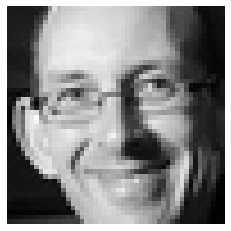

In [17]:
show(train_images[213])

In [18]:
trainlabelflat=train_data["emotion"].values.ravel()
trainlabelcount=np.unique(trainlabelflat).shape[0]
print("farklı yüzlerin ifadeleri sayısı: ",trainlabelcount)

farklı yüzlerin ifadeleri sayısı:  7


In [19]:
def dense_to_onehot(dense,clases):
  numlabels=dense.shape[0]
  indexoffset=np.arange(numlabels)*clases
  labelsonehot=np.zeros((numlabels,clases))
  labelsonehot.flat[indexoffset+dense.ravel()]=1
  return labelsonehot

In [20]:
y_train=dense_to_onehot(trainlabelflat,trainlabelcount)
y_train=y_train.astype(np.uint8)
print("eğitim işlem boyutu: ",y_train.shape)

eğitim işlem boyutu:  (28709, 7)


In [21]:
np.unique(data["Usage"].values.ravel())
print("test örnek sayısı: ",len(data[data["Usage"]=="PublicTest"]))

test örnek sayısı:  3589


In [22]:
test_data=data[data["Usage"]=="PublicTest"]
test_pixel=test_data.pixels.str.split(" ").tolist()
test_pixel=pd.DataFrame(test_pixel,dtype=int)
test_images=test_pixel.values
test_images=test_images.astype(np.float)
print(test_images)
print(test_images.shape)

[[254. 254. 254. ...  42. 129. 180.]
 [156. 184. 198. ... 172. 167. 161.]
 [ 69. 118.  61. ...  88.  87.  90.]
 ...
 [255. 255. 255. ...  48.  50.  46.]
 [ 33.  25.  31. ...   4.   5.   4.]
 [ 61.  63.  59. ... 113. 165. 180.]]
(3589, 2304)


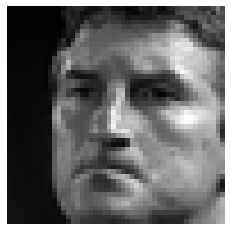

In [23]:
show(test_images[213])

In [24]:
testlabelflat=test_data["emotion"].values.ravel()
testlabelcount=np.unique(testlabelflat).shape[0]
y_test=dense_to_onehot(testlabelflat,testlabelcount)
y_test=y_test.astype(np.uint8)
print("test işlem boyutu: ",y_test.shape)

test işlem boyutu:  (3589, 7)


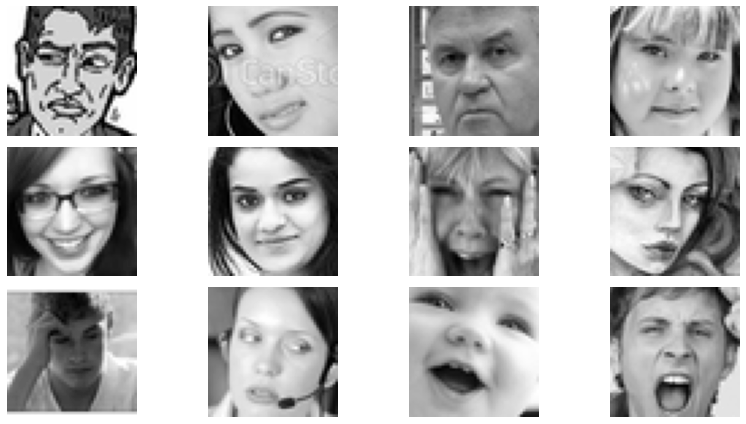

In [25]:
plt.figure(figsize=(12,6))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.axis("off")

  image=test_images[i].reshape(48,48)
  plt.imshow(image,cmap="gray")
plt.tight_layout()
plt.show()

In [26]:
model=Sequential()

In [28]:
model.add(Conv2D(64,3,data_format="channels_last",kernel_initializer="he_normal",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

In [29]:
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))

In [31]:
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

In [32]:
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

In [33]:
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))

In [34]:
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

In [35]:
model.add(Dense(7))
model.add(Activation("softmax"))
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 42, 42, 64)        0

In [37]:
x_train=train_images.reshape(-1,48,48,1)
x_test=test_images.reshape(-1,48,48,1)

print(x_test.shape)
print(x_train.shape)

(3589, 48, 48, 1)
(28709, 48, 48, 1)


In [38]:
print(y_test.shape)
print(y_train.shape)

(3589, 7)
(28709, 7)


In [39]:
ls

 CNN.py               'modeller ve katmanlar.ipynb'
 colab_ML.ipynb        rakam_tanıma.ipynb
 duygu_tanima.ipynb    resim/
 fashion_mnist.ipynb   resnet50_nesneTanima.ipynb
 fer2013.csv           vektör-matris-tensör.ipynb
 MNIST_YSA.ipynb       VGG16_nesneTanima.ipynb


In [40]:
check=ModelCheckpoint(filepath="face_model.h5",verbose=1,save_best_only=True)

In [41]:
hist=model.fit(x_train,y_train,
               batch_size=100,
               epochs=10,
               validation_data=(x_test,y_test),
               callbacks=[check],verbose=2)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.73970, saving model to face_model.h5
288/288 - 12s - loss: 2.0527 - accuracy: 0.2265 - val_loss: 1.7397 - val_accuracy: 0.3090
Epoch 2/10

Epoch 00002: val_loss did not improve from 1.73970
288/288 - 11s - loss: 1.7654 - accuracy: 0.2917 - val_loss: 1.7503 - val_accuracy: 0.2889
Epoch 3/10

Epoch 00003: val_loss did not improve from 1.73970
288/288 - 11s - loss: 1.6716 - accuracy: 0.3387 - val_loss: 1.8655 - val_accuracy: 0.2859
Epoch 4/10

Epoch 00004: val_loss improved from 1.73970 to 1.51340, saving model to face_model.h5
288/288 - 12s - loss: 1.5919 - accuracy: 0.3783 - val_loss: 1.5134 - val_accuracy: 0.4040
Epoch 5/10

Epoch 00005: val_loss did not improve from 1.51340
288/288 - 11s - loss: 1.5221 - accuracy: 0.4060 - val_loss: 1.8789 - val_accuracy: 0.3243
Epoch 6/10

Epoch 00006: val_loss improved from 1.51340 to 1.47184, saving model to face_model.h5
288/288 - 12s - loss: 1.4602 - accuracy: 0.4348 - val_loss: 1.4718 - va

In [43]:
json=model.to_json()
with open("face_model.json","w") as json_file:
  json_file.write(json)

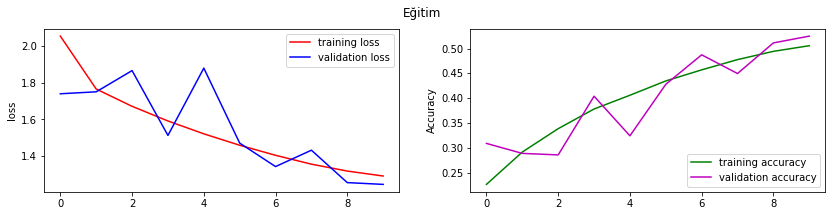

In [61]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle("Eğitim")
plt.ylabel("loss")
plt.plot(hist.history["loss"],color="r",label="training loss")
plt.plot(hist.history["val_loss"],color="b",label="validation loss")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"],color="g",label="training accuracy")
plt.plot(hist.history["val_accuracy"],color="m",label="validation accuracy")
plt.legend(loc="lower right")
plt.show()

In [63]:
test=data[["pixels","emotion"]][data["Usage"]=="PrivateTest"]
test["pixels"]=test["pixels"].apply(lambda im:np.fromstring(im,sep=" "))
test.head()

,pixels,emotion
32298,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ...",0
32299,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ...",5
32300,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246...",6
32301,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111....",4
32302,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78....",2


In [65]:
x_test_private=np.vstack(test["pixels"].values)
y_test_private=np.array(test["emotion"])

In [66]:
x_test_private=x_test_private.reshape(-1,48,48,1)
y_test_private=np_utils.to_categorical(y_test_private)

In [67]:
x_test_private.shape

(3589, 48, 48, 1)

In [68]:
y_test_private.shape

(3589, 7)

In [69]:
skor=model.evaluate(x_test_private,y_test_private,verbose=2)
print("private test doğruluğu: ",skor)

113/113 - 1s - loss: 1.2414 - accuracy: 0.5194
private test doğruluğu:  [1.2414404153823853, 0.5193647146224976]


In [70]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [71]:
ls

 CNN.py               fashion_mnist.ipynb            resim/
 colab_ML.ipynb       fer2013.csv                    resnet50_nesneTanima.ipynb
 duygu_tanima.ipynb   MNIST_YSA.ipynb                vektör-matris-tensör.ipynb
 face_model.h5       'modeller ve katmanlar.ipynb'   VGG16_nesneTanima.ipynb
 face_model.json      rakam_tanıma.ipynb


In [72]:
model_best=load_model("face_model.h5")

In [106]:
os.chdir("/gdrive/My Drive/colab_derinOgrenme/resim")

In [107]:
ls

asd.jpg       f16.jfif         kemalsunal.webp    saskin2.jpg        yakup.JPG
baby.jfif     f35.jpg          kizgin.jpg         saskin.jpg
buldog.jfif   inek-saban.webp  marlon-brando.jpg  scottish-fold.jpg
dakhund.jfif  kedi.jpg         mutlu.png          siyam.jpg


In [114]:
path="asd.jpg"

original=image.load_img(path)

test_image=image.load_img(path,target_size=(48,48),grayscale=True)
test_data=image.img_to_array(test_image)
test_data=np.expand_dims(test_data,axis=0)
test_data=np.vstack([test_data])

sonuc=model_best.predict(test_data,batch_size=1)
sonuc

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0.15162775, 0.00940397, 0.2288443 , 0.16227004, 0.08222633,
        0.28936082, 0.0762668 ]], dtype=float32)

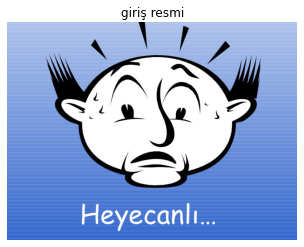

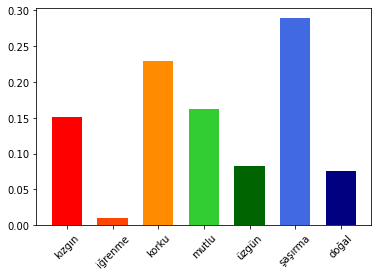

In [115]:
durum=["kızgın","iğrenme","korku","mutlu","üzgün","şaşırma","doğal"]

ind=0.1+0.6*np.arange(len(durum))
width=0.4   #bar genişliği
color_list=["red","orangered","darkorange","limegreen","darkgreen","royalblue","navy"]

plt.imshow(original)
plt.title("giriş resmi")
plt.axis("off")
plt.show()

for i in range(len(durum)):
  plt.bar(ind[i],sonuc[0][i],width,color=color_list[i])
plt.xticks(ind,durum,rotation=45)
plt.show()

In [116]:
print("yüksek oranla durumu: ",durum[np.argmax(sonuc)])

yüksek oranla durumu:  şaşırma
